## イベントマッチのブキ使用率

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from packages.japanize import japanize
import packages.db as db
from packages.i18n import Locale, Translator
import packages.image as image
import packages.definitions as d
import packages.utils as u
import packages.visualize as v

locale = Locale.JA
lobby = d.Lobby.EVENT
date_from = dt.date(2023, 6, 28)
date_to = dt.date(2023, 6, 29)
battles = db.load_battles(lobby=lobby, date_from=date_from, date_to=date_to)

In [2]:
event = battles["event"].value_counts().index[0]
battles["event"].value_counts()

Foggy Notion    4512
Name: event, dtype: int64

パワー不明バトル数: 1810


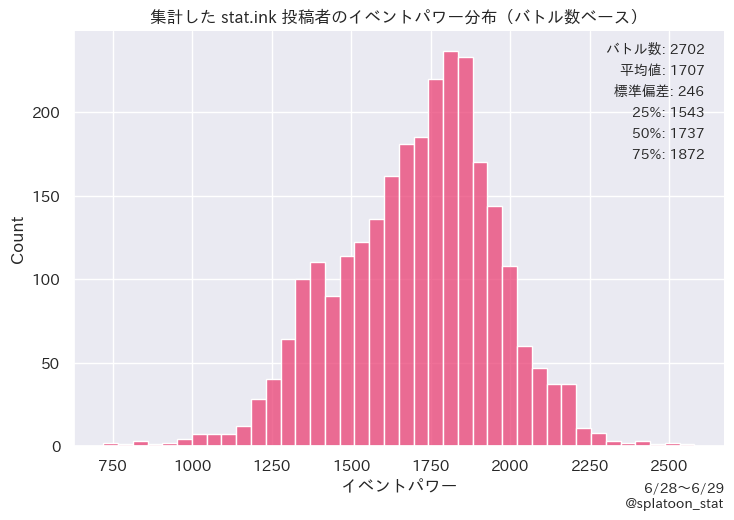

In [3]:
v.event_power_distribution(battles, locale)

In [4]:
players = u.to_players(battles)

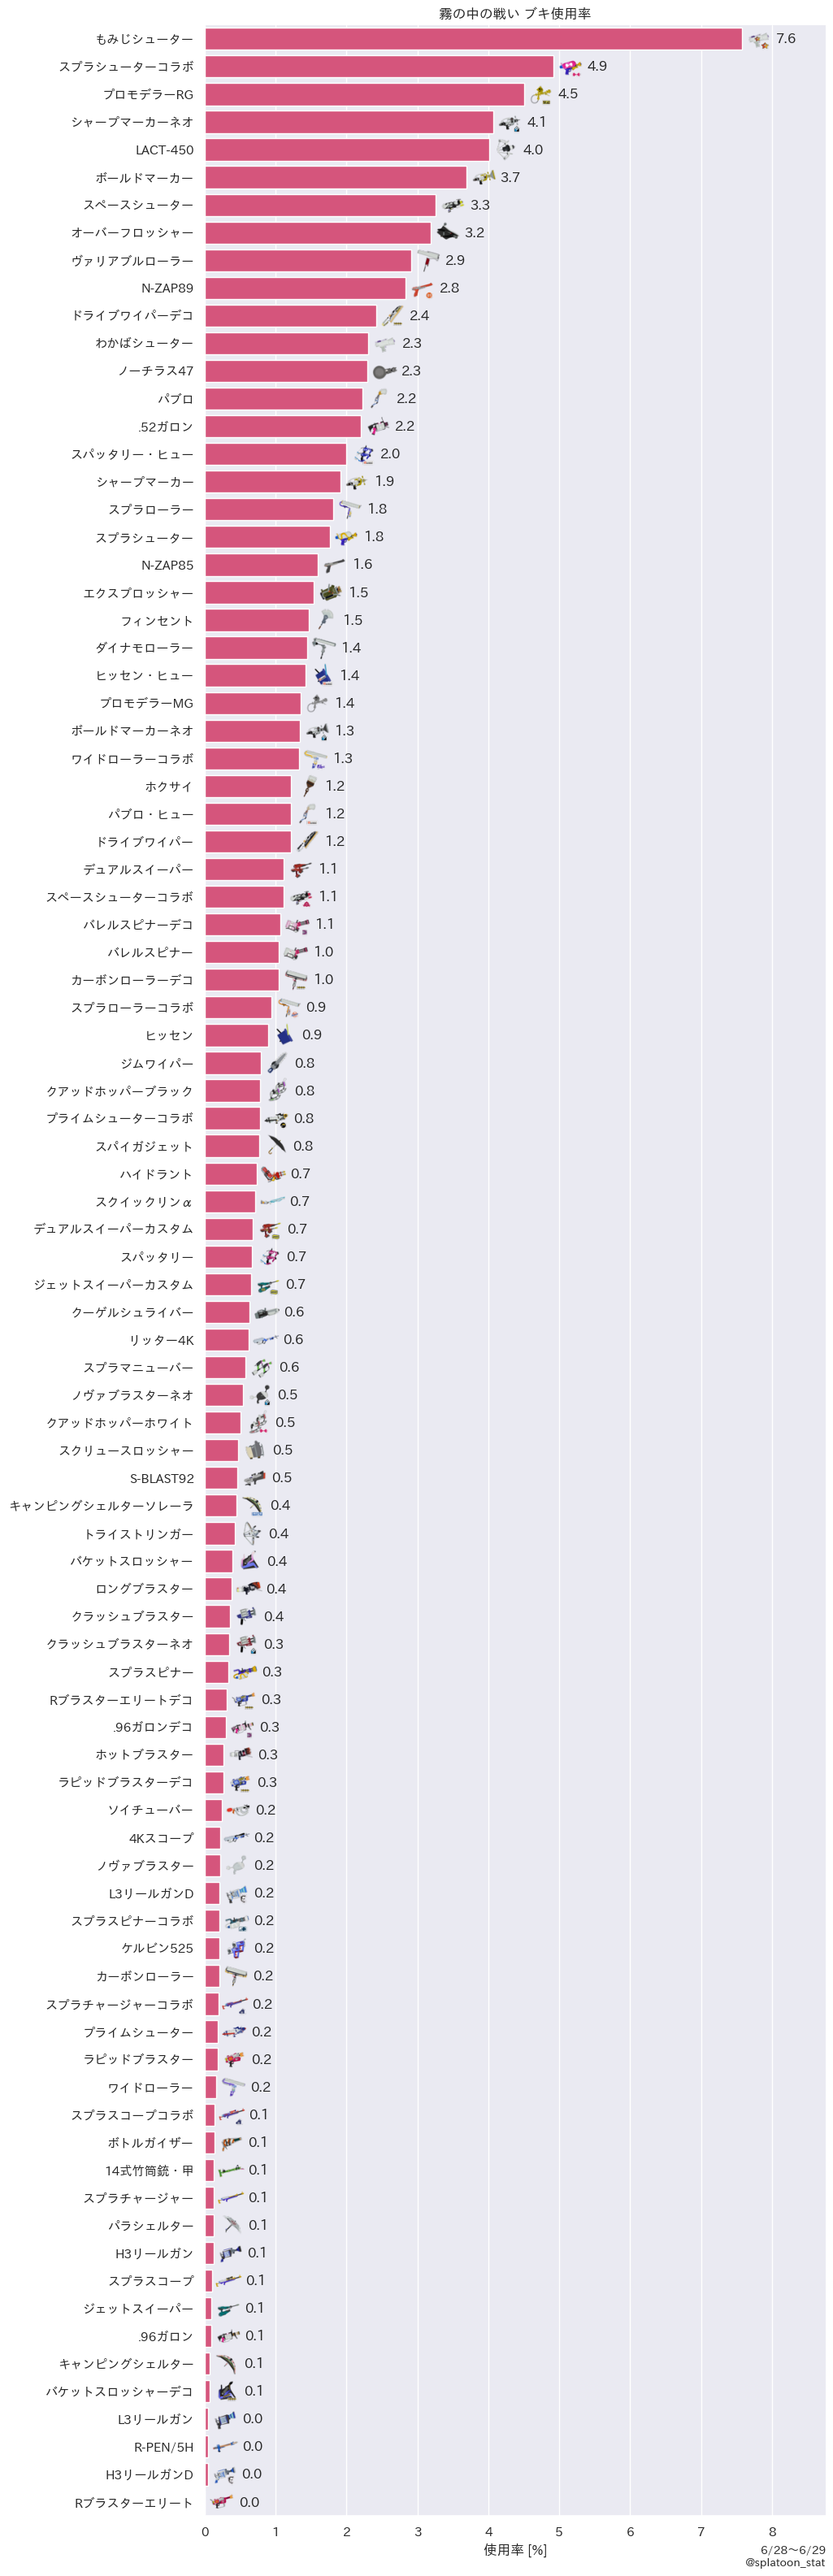

In [9]:
usage = players["weapon"].value_counts(normalize=True).mul(100).reset_index().set_axis(["weapon", "usage"], axis=1)

sns.set_theme()
japanize()

i18n = Translator(locale)
i18n.add("title", "${event} ブキ使用率", "Weapon usage in ${event}")
i18n.add("usage", "使用率 [%]", "Usage [%]")

width = 10
height = len(usage) * 0.35

g = sns.catplot(
    data=usage,
    x="usage",
    y="weapon",
    kind="bar",
    color=d.Color.EVENT.value,
    height=height,
    aspect=width/height,
)
ax = g.ax

xmin, xmax = ax.get_xlim()
image_offset = xmax * 0.03

xkeys, ykeys = u.get_ax_ticklabels(ax)
yticklabels = [i18n.t(x) for x in ykeys]

ax.set(
    title=i18n.t("title", lobby=i18n.t(lobby.value), event=i18n.t(event)),
    ylabel="",
    xlabel=i18n.t("usage"),
    xlim=(xmin, xmax * 1.1),
)
ax.bar_label(ax.containers[0], fmt="%.1f", padding=30)
ax.yaxis.set_ticklabels(yticklabels)

yvalues = usage["usage"].to_list()
for i, (key, value) in enumerate(zip(ykeys, yvalues)):
    image_path = image.get_image_path(key)
    img = OffsetImage(plt.imread(image_path), zoom=.65)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0, 0), xybox=(value + image_offset, i), frameon=False)
    ax.add_artist(ab)

u.credit(ax, g.fig, i18n.t_data_duration(battles), 1.0)

plt.show()

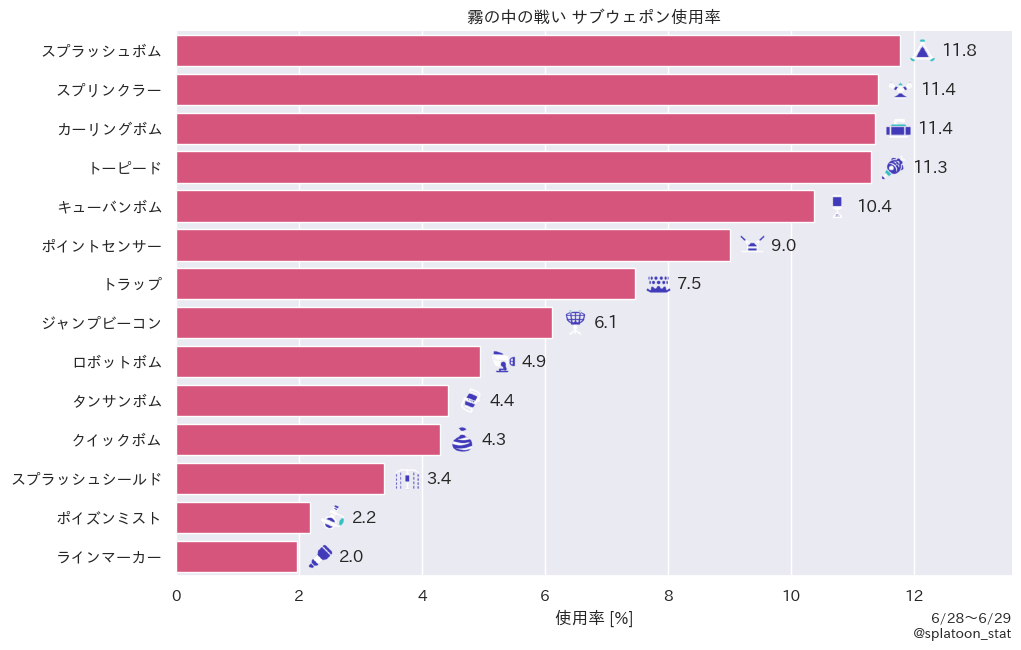

In [6]:
usage = players["sub-weapon"].value_counts(normalize=True).mul(100).reset_index().set_axis(["weapon", "usage"], axis=1)

sns.set_theme()
japanize()

i18n = Translator(locale)
i18n.add("title", "${event} サブウェポン使用率", "Sub weapon usage in ${event}")
i18n.add("usage", "使用率 [%]", "Usage [%]")

width = 10
height = len(usage) * 0.45

g = sns.catplot(
    data=usage,
    x="usage",
    y="weapon",
    kind="bar",
    color=d.Color.EVENT.value,
    height=height,
    aspect=width/height,
)
ax = g.ax

xmin, xmax = ax.get_xlim()
image_offset = xmax * 0.03

xkeys, ykeys = u.get_ax_ticklabels(ax)
yticklabels = [i18n.t(x) for x in ykeys]

ax.set(
    title=i18n.t("title", lobby=i18n.t(lobby.value), event=i18n.t(event)),
    ylabel="",
    xlabel=i18n.t("usage"),
    xlim=(xmin, xmax * 1.1),
)
ax.bar_label(ax.containers[0], fmt="%.1f", padding=30)
ax.yaxis.set_ticklabels(yticklabels)

yvalues = usage["usage"].to_list()
for i, (key, value) in enumerate(zip(ykeys, yvalues)):
    image_path = image.get_image_path(key)
    img = OffsetImage(plt.imread(image_path), zoom=.5)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0, 0), xybox=(value + image_offset, i), frameon=False)
    ax.add_artist(ab)

u.credit(ax, g.fig, i18n.t_data_duration(battles), 1.0)

plt.show()

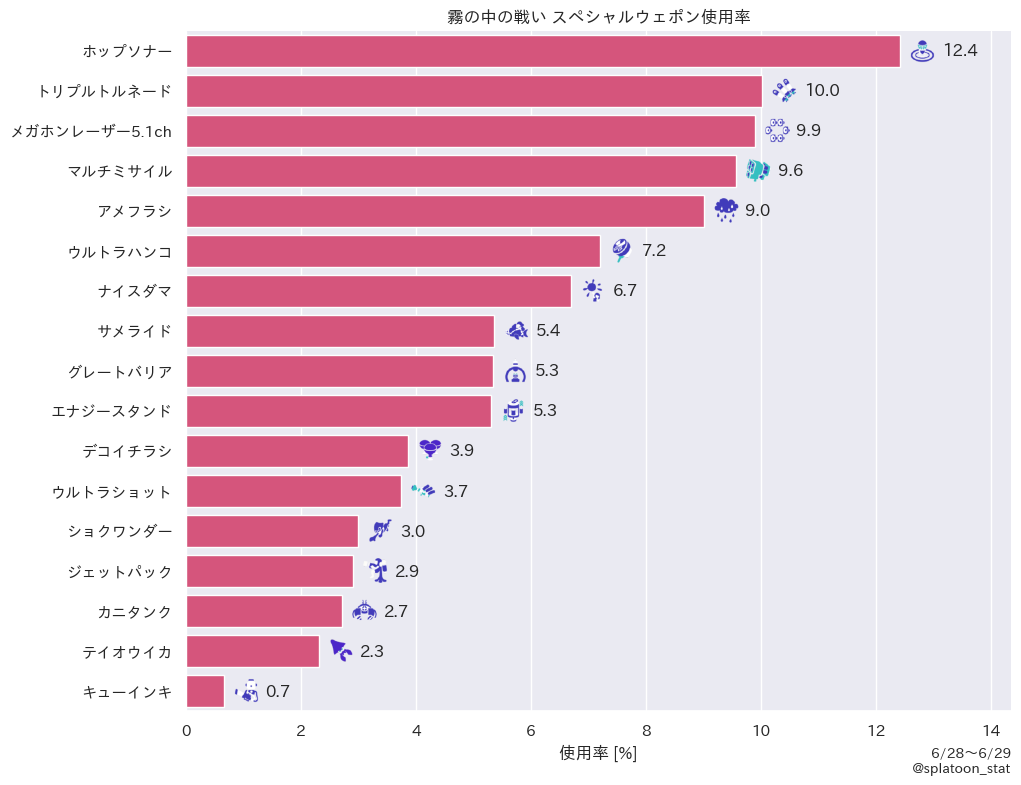

In [7]:
usage = players["special-weapon"].value_counts(normalize=True).mul(100).reset_index().set_axis(["weapon", "usage"], axis=1)

sns.set_theme()
japanize()

i18n = Translator(locale)
i18n.add("title", "${event} スペシャルウェポン使用率", "Special weapon usage in ${event}")
i18n.add("usage", "使用率 [%]", "Usage [%]")

width = 10
height = len(usage) * 0.45

g = sns.catplot(
    data=usage,
    x="usage",
    y="weapon",
    kind="bar",
    color=d.Color.EVENT.value,
    height=height,
    aspect=width/height,
)
ax = g.ax

xmin, xmax = ax.get_xlim()
image_offset = xmax * 0.03

xkeys, ykeys = u.get_ax_ticklabels(ax)
yticklabels = [i18n.t(x) for x in ykeys]

ax.set(
    title=i18n.t("title", lobby=i18n.t(lobby.value), event=i18n.t(event)),
    ylabel="",
    xlabel=i18n.t("usage"),
    xlim=(xmin, xmax * 1.1),
)
ax.bar_label(ax.containers[0], fmt="%.1f", padding=30)
ax.yaxis.set_ticklabels(yticklabels)

yvalues = usage["usage"].to_list()
for i, (key, value) in enumerate(zip(ykeys, yvalues)):
    image_path = image.get_image_path(key)
    img = OffsetImage(plt.imread(image_path), zoom=.5)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0, 0), xybox=(value + image_offset, i), frameon=False)
    ax.add_artist(ab)

u.credit(ax, g.fig, i18n.t_data_duration(battles), 1.0)

plt.show()